In [41]:
#importing the inbuilt library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the Dataset

In [43]:
df = pd.read_csv('/content/drive/MyDrive/BTAA_Project2/Spotify_Data_Sample.csv')

<ipython-input-43-ab1a27542cb4>:1: DtypeWarning: Columns (136,137,138,141,143,144,146,149,151,152,154,157,159,160,162,165,167,168,170,173,175,176,178,181,183,184,186,189,191,192,194,197,199,200,202,205,207,208,210,213,215,216,218,221,223,224,226,229,231,232,234,237,239,240,242,245,247,248,250,253,255,256,258,261,263,264,266,269,271,272,274,277,279,280,282,285,287,288,290,293,295,296,298,301,303,304,306,309,311,312,314,317,319,320,322,325,327,328,330,333,335,336,338,341,343,344,346,349,351,352,354,357,359,360,362,365,367,368,370,373,375,376,378,381,383,384,386,389,391,392,394,397,399,400,402,405,407,408,410,413,415,416,418,421,423,424,425,426,429,431,432,434,437,439,440,442,445,447,448,450,453,455,456,458,461,463,464,466,469,471,472,474,477,479,480,482,485,487,488,490,493,495,496,498,501,503,504,506,509,511,512,514,517,519,520,522,525,527,528,530,533,535,536,538,541,543,544,546,549,551,552,554,557,559,560,562,565,567,568,569,570,573,575,576,577,578,581,583,584,586,589,591,592,594,597,59

In [44]:
df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks/0/pos,tracks/0/artist_name,tracks/0/track_uri,...,Unnamed: 2001,Unnamed: 2002,Unnamed: 2003,Unnamed: 2004,Unnamed: 2005,Unnamed: 2006,Unnamed: 2007,Unnamed: 2008,Unnamed: 2009,Unnamed: 2010
0,Throwbacks,False,0,1493424000,52,47,1,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Awesome Playlist,False,1,1506556800,39,23,1,0,Survivor,spotify:track:2HHtWyy5CgaQbC7XSoOb0e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,korean,False,2,1505692800,64,51,1,0,Hoody,spotify:track:74tqql9zP6JjF5hjkHHUXp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mat,False,3,1501027200,126,107,1,0,Camille Saint-Saëns,spotify:track:4WJ7UMD4i6DOPzyXU5pZSz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90s,False,4,1401667200,17,16,2,0,The Smashing Pumpkins,spotify:track:4iCGSi1RonREsPtfEKYj5b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Feeling Good,False,5995,1426809600,18,16,1,0,Nina Simone,spotify:track:61S0mEfdRtJ62Fc7fPqx0U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,Frost,False,5996,1427068800,67,61,1,0,Slow Magic,spotify:track:4jC2ifws6KbDoXBTkSQiPr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,Kenya,False,5997,1384646400,29,28,2,0,Blood Orange,spotify:track:2iR4oHXi5qsb17b0KHVpon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,17-Aug,False,5998,1504224000,66,64,1,0,Big Sean,spotify:track:1jQsKN68yE94tMYml0wHMd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df1 = df

In [46]:
df1.num_edits.value_counts()

num_edits
52.0                                    1201
52                                       264
2                                         97
3                                         90
4                                         73
                                        ... 
spotify:album:2lLcMACDvCkys7KuQamg82       1
spotify:album:5XyJzEROSmup2TcWmVjTIt       1
spotify:album:0TyDTzG2zt2tg0wONT9wSU       1
spotify:album:5Ew5vOg3PYyT9QUPCrdIZq       1
spotify:album:4Z1kH6bfeeMYtCuhnR4vEr       1
Name: count, Length: 554, dtype: int64

In [47]:
df1.duration_ms.value_counts()

duration_ms
Drake                      17
Migos                      10
Imagine Dragons             9
The Weeknd                  8
Chance The Rapper           7
                           ..
1914114                     1
10056945                    1
10142356                    1
7910361                     1
Bullet For My Valentine     1
Name: count, Length: 2499, dtype: int64

# Feature Selection

In [48]:
#Dropping all the columns except first 7
df1 = df.iloc[:, :7]
df1

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers
0,Throwbacks,False,0,1493424000,52,47,1
1,Awesome Playlist,False,1,1506556800,39,23,1
2,korean,False,2,1505692800,64,51,1
3,mat,False,3,1501027200,126,107,1
4,90s,False,4,1401667200,17,16,2
...,...,...,...,...,...,...,...
4995,Feeling Good,False,5995,1426809600,18,16,1
4996,Frost,False,5996,1427068800,67,61,1
4997,Kenya,False,5997,1384646400,29,28,2
4998,17-Aug,False,5998,1504224000,66,64,1


In [49]:
df["tracks/1/artist_name"]

0            Britney Spears
1            Daniel Tidwell
2                      Loco
3       Camille Saint-Saëns
4                     Oasis
               ...         
4995         Capital Cities
4996               Lemonade
4997           Blood Orange
4998             Liam Payne
4999               Skrillex
Name: tracks/1/artist_name, Length: 5000, dtype: object

Feature Engineering

In [50]:
import re

pattern = r'tracks/\d+/artist_name'

TRACK_COLUMNS = [s for s in list(df.columns) if re.search(pattern, s)]
TRACK_COLUMNS[:5]

['tracks/0/artist_name',
 'tracks/1/artist_name',
 'tracks/2/artist_name',
 'tracks/3/artist_name',
 'tracks/4/artist_name']

In [51]:
#Create a new feature "Popularity Score"
def combine_artist_names(row):
  # return row[TRACK_COLUMNS[0]]
    artist_names = []
    for cur_column in TRACK_COLUMNS:
      if type(row[cur_column]) == str:
        artist_names.append(row[cur_column])
      else:
        pass
    return artist_names

df1['all_artist_names'] = df.apply(lambda x:combine_artist_names(x),axis=1)

df1['all_artist_names'].apply(lambda x: len(x))
df1['all_artist_names']

0       [Missy Elliott, Britney Spears, Beyoncé, Justi...
1       [Survivor, Daniel Tidwell, Daniel Tidwell, Dan...
2       [Hoody, Loco, Park Kyung, Park Kyung, BTS, Lov...
3       [Camille Saint-Saëns, Camille Saint-Saëns, No ...
4       [The Smashing Pumpkins, Oasis, Aerosmith, Nata...
                              ...                        
4995    [Nina Simone, Capital Cities, Passion Pit, Ms....
4996    [Slow Magic, Lemonade, Lemonade, St. Lucia, Di...
4997    [Blood Orange, Blood Orange, Quadron, Kindness...
4998    [Big Sean, Liam Payne, Kesha, Russ, Jaden Smit...
4999    [Skrillex, Skrillex, Eminem, Eminem, Lil Wayne...
Name: all_artist_names, Length: 5000, dtype: object

In [52]:
#Taking top 20 artists from dataset to calculate the popularity score
from collections import Counter
all_artists = [artist for artist_list in df1['all_artist_names'] for artist in artist_list]

# Step 4: Calculate the frequency of each artist using Counter
artist_frequencies = Counter(all_artists)

# Step 5: Sort the frequencies in descending order and return the top 5 artists
top_20_artists = artist_frequencies.most_common(20)
artist_top = []
print("Top 20 Artists Frequency-wise:")
for artist, frequency in top_20_artists:
    artist_top.append(artist)
    print(artist, ":", frequency)

Top 20 Artists Frequency-wise:
Drake : 3257
Kanye West : 1495
Kendrick Lamar : 1371
Rihanna : 1224
The Weeknd : 1147
Ed Sheeran : 1062
Eminem : 1024
Future : 996
J. Cole : 944
Beyoncé : 911
The Chainsmokers : 886
Justin Bieber : 857
Lil Uzi Vert : 802
Luke Bryan : 797
Twenty One Pilots : 783
Calvin Harris : 775
Big Sean : 774
Post Malone : 757
Coldplay : 754
Chris Brown : 735


In [53]:
# Calculate the popularity score for each playlist
def calculate_popularity_score(artist_names):
    # Count the number of unique artists from the top 20 present in the playlist
    unique_top_artists = set(artist_names) & set(artist_top)
    #print(unique_top_artists)
    # Calculate the score by dividing the count by 20
    popularity_score = min(len(unique_top_artists) / 20, 1.0)
    return popularity_score

# Apply the function to each playlist to calculate the popularity score
df1['popularity_score'] = df1['all_artist_names'].apply(calculate_popularity_score)

# Display the DataFrame with the new column
print(df1[['pid', 'name', 'popularity_score']])


       pid              name  popularity_score
0        0        Throwbacks              0.15
1        1  Awesome Playlist              0.00
2        2           korean               0.00
3        3               mat              0.00
4        4               90s              0.00
...    ...               ...               ...
4995  5995      Feeling Good              0.00
4996  5996             Frost              0.00
4997  5997             Kenya              0.00
4998  5998            17-Aug              0.15
4999  5999            Cardio              0.20

[5000 rows x 3 columns]


In [54]:
df1.popularity_score.describe()

count    5000.000000
mean        0.087660
std         0.120999
min         0.000000
25%         0.000000
50%         0.050000
75%         0.150000
max         0.800000
Name: popularity_score, dtype: float64

In [55]:
df = df1
df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,all_artist_names,popularity_score
0,Throwbacks,False,0,1493424000,52,47,1,"[Missy Elliott, Britney Spears, Beyoncé, Justi...",0.15
1,Awesome Playlist,False,1,1506556800,39,23,1,"[Survivor, Daniel Tidwell, Daniel Tidwell, Dan...",0.00
2,korean,False,2,1505692800,64,51,1,"[Hoody, Loco, Park Kyung, Park Kyung, BTS, Lov...",0.00
3,mat,False,3,1501027200,126,107,1,"[Camille Saint-Saëns, Camille Saint-Saëns, No ...",0.00
4,90s,False,4,1401667200,17,16,2,"[The Smashing Pumpkins, Oasis, Aerosmith, Nata...",0.00
...,...,...,...,...,...,...,...,...,...
4995,Feeling Good,False,5995,1426809600,18,16,1,"[Nina Simone, Capital Cities, Passion Pit, Ms....",0.00
4996,Frost,False,5996,1427068800,67,61,1,"[Slow Magic, Lemonade, Lemonade, St. Lucia, Di...",0.00
4997,Kenya,False,5997,1384646400,29,28,2,"[Blood Orange, Blood Orange, Quadron, Kindness...",0.00
4998,17-Aug,False,5998,1504224000,66,64,1,"[Big Sean, Liam Payne, Kesha, Russ, Jaden Smit...",0.15


In [56]:
#dropping columns "pid" and "all_artist_names"
df.drop(["pid","all_artist_names"], axis="columns", inplace = True)
df

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,popularity_score
0,Throwbacks,False,1493424000,52,47,1,0.15
1,Awesome Playlist,False,1506556800,39,23,1,0.00
2,korean,False,1505692800,64,51,1,0.00
3,mat,False,1501027200,126,107,1,0.00
4,90s,False,1401667200,17,16,2,0.00
...,...,...,...,...,...,...,...
4995,Feeling Good,False,1426809600,18,16,1,0.00
4996,Frost,False,1427068800,67,61,1,0.00
4997,Kenya,False,1384646400,29,28,2,0.00
4998,17-Aug,False,1504224000,66,64,1,0.15


In [57]:
#Mapping Boolean values to numerical values 0 and 1
df['collaborative'] = df['collaborative'].map({False: 0, True: 1})
df

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,popularity_score
0,Throwbacks,0,1493424000,52,47,1,0.15
1,Awesome Playlist,0,1506556800,39,23,1,0.00
2,korean,0,1505692800,64,51,1,0.00
3,mat,0,1501027200,126,107,1,0.00
4,90s,0,1401667200,17,16,2,0.00
...,...,...,...,...,...,...,...
4995,Feeling Good,0,1426809600,18,16,1,0.00
4996,Frost,0,1427068800,67,61,1,0.00
4997,Kenya,0,1384646400,29,28,2,0.00
4998,17-Aug,0,1504224000,66,64,1,0.15


# Exploratory Data Analysis

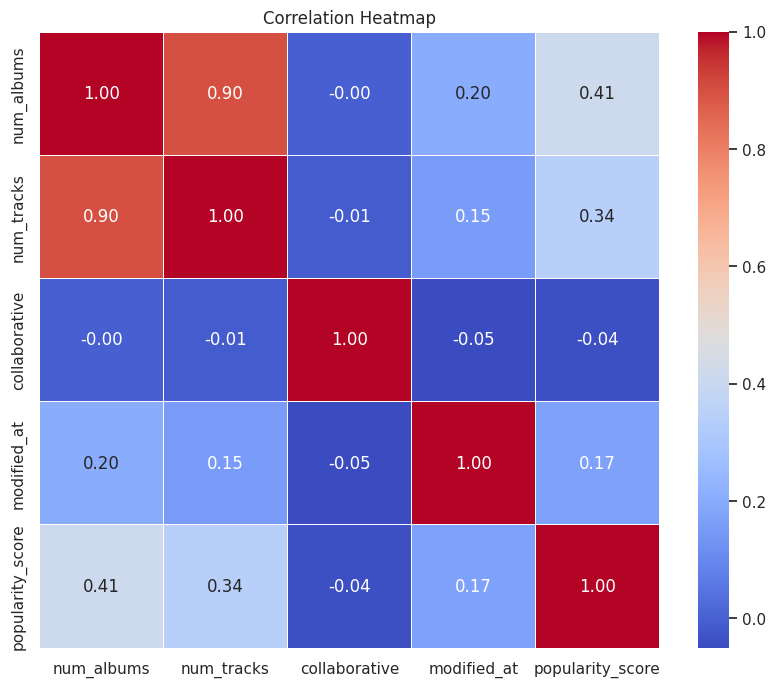

In [58]:
# Calculate the correlation matrix
correlation_matrix = df[['num_albums', 'num_tracks','collaborative', 'modified_at','popularity_score']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

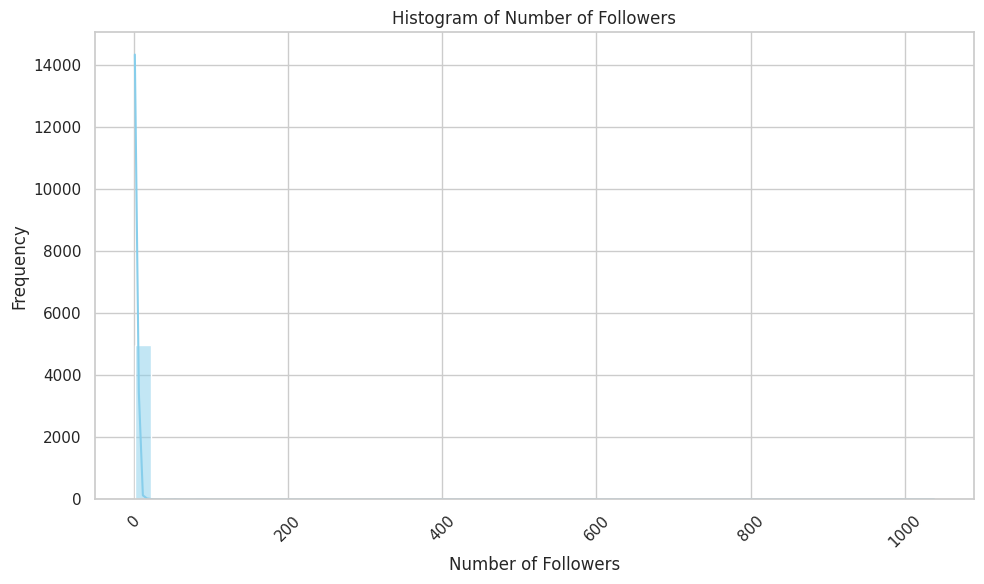

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histogram of count of num followers
plt.figure(figsize=(10, 6))
sns.histplot(df['num_followers'], bins=50, kde=True, color='skyblue')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Followers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [20]:
df['num_followers'].value_counts()

num_followers
1       3782
2        725
3        236
4        116
5         38
6         37
7         15
8         15
9          7
13         3
11         3
52         2
14         2
17         2
15         2
18         2
10         2
22         1
1038       1
20         1
87         1
82         1
23         1
12         1
16         1
53         1
128        1
29         1
Name: count, dtype: int64

In [21]:
df.num_followers.describe()

count    5000.000000
mean        1.787600
std        14.977201
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1038.000000
Name: num_followers, dtype: float64

# Regression

MSE of Different Models

In [22]:
X = df[['num_albums', 'num_tracks','collaborative', 'modified_at', 'popularity_score']]  # Features
y = df['num_followers']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print("Decision Tree MSE:", dt_mse)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
print("KNN MSE:", knn_mse)

# Support Vector Machine
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
print("SVM MSE:", svm_mse)

Linear Regression MSE: 1084.526810603685
Decision Tree MSE: 1090.374
KNN MSE: 1087.8436399999996
SVM MSE: 1085.8881583717314


R^2 Score of Different Models

In [23]:
from sklearn.metrics import r2_score

# Linear Regression
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression R^2 Score:", lr_r2)

# Decision Tree
dt_r2 = r2_score(y_test, dt_pred)
print("Decision Tree R^2 Score:", dt_r2)

# K-Nearest Neighbors
knn_r2 = r2_score(y_test, knn_pred)
print("KNN R^2 Score:", knn_r2)

# Support Vector Machine
svm_r2 = r2_score(y_test, svm_pred)
print("SVM R^2 Score:", svm_r2)


Linear Regression R^2 Score: -0.000870015188083384
Decision Tree R^2 Score: -0.006266171818494204
KNN R^2 Score: -0.003930995383139901
SVM R^2 Score: -0.0021263531116451073


# Classification

Converting Target Variable "Number of Followers" into Binary Class "Popular and "Not Popular"

Popularity
Not Popular    4897
Popular         103
Name: count, dtype: int64


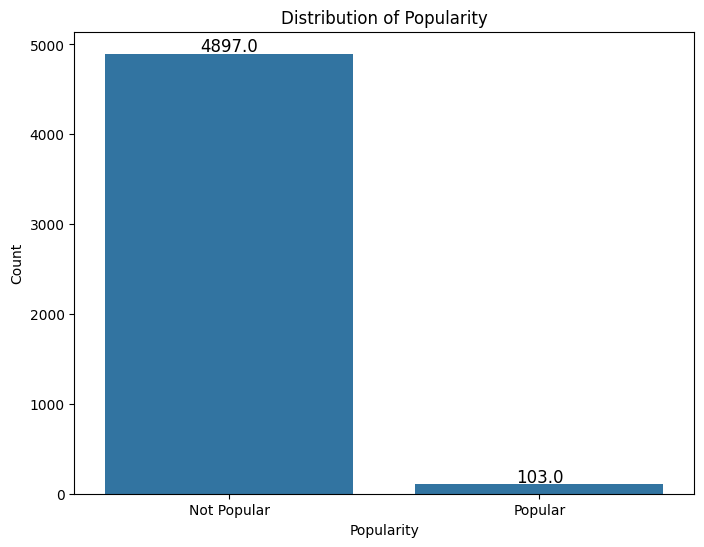

In [24]:
# Define the bins for classifying the number of followers
bins = [-float('inf'), 5, float('inf')]
labels = ['Not Popular', 'Popular']

# Convert the 'num_followers' column into three classes
df['Popularity'] = pd.cut(df['num_followers'], bins=bins, labels=labels)

# Print the count of playlists in each class
print(df['Popularity'].value_counts())

# Visualize the distribution of follower classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Popularity', data=df, order=labels)

# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

In [25]:
df

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,popularity_score,Popularity
0,Throwbacks,0,1493424000,52,47,1,0.15,Not Popular
1,Awesome Playlist,0,1506556800,39,23,1,0.00,Not Popular
2,korean,0,1505692800,64,51,1,0.00,Not Popular
3,mat,0,1501027200,126,107,1,0.00,Not Popular
4,90s,0,1401667200,17,16,2,0.00,Not Popular
...,...,...,...,...,...,...,...,...
4995,Feeling Good,0,1426809600,18,16,1,0.00,Not Popular
4996,Frost,0,1427068800,67,61,1,0.00,Not Popular
4997,Kenya,0,1384646400,29,28,2,0.00,Not Popular
4998,17-Aug,0,1504224000,66,64,1,0.15,Not Popular


In [26]:
df.drop(columns = ['num_followers'],inplace=True)
df

,name,collaborative,modified_at,num_tracks,num_albums,popularity_score,Popularity
0,Throwbacks,0,1493424000,52,47,0.15,Not Popular
1,Awesome Playlist,0,1506556800,39,23,0.00,Not Popular
2,korean,0,1505692800,64,51,0.00,Not Popular
3,mat,0,1501027200,126,107,0.00,Not Popular
4,90s,0,1401667200,17,16,0.00,Not Popular
...,...,...,...,...,...,...,...
4995,Feeling Good,0,1426809600,18,16,0.00,Not Popular
4996,Frost,0,1427068800,67,61,0.00,Not Popular
4997,Kenya,0,1384646400,29,28,0.00,Not Popular
4998,17-Aug,0,1504224000,66,64,0.15,Not Popular


In [27]:
df['Popularity'] = df['Popularity'].map({'Not Popular': 0, 'Popular': 1})
df

,name,collaborative,modified_at,num_tracks,num_albums,popularity_score,Popularity
0,Throwbacks,0,1493424000,52,47,0.15,0
1,Awesome Playlist,0,1506556800,39,23,0.00,0
2,korean,0,1505692800,64,51,0.00,0
3,mat,0,1501027200,126,107,0.00,0
4,90s,0,1401667200,17,16,0.00,0
...,...,...,...,...,...,...,...
4995,Feeling Good,0,1426809600,18,16,0.00,0
4996,Frost,0,1427068800,67,61,0.00,0
4997,Kenya,0,1384646400,29,28,0.00,0
4998,17-Aug,0,1504224000,66,64,0.15,0


In [28]:
df.Popularity.describe()

count     5000
unique       2
top          0
freq      4897
Name: Popularity, dtype: int64

In [29]:
# Separate features and target variable
X = df[['num_albums', 'num_tracks','collaborative', 'modified_at', 'popularity_score']]  # Features
y = df['Popularity']  # Target variable

# **UNDER SAMPLING**

In [30]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_resampled.value_counts())


Class distribution after undersampling:
Popularity
0    103
1    103
Name: count, dtype: int64


Train-Test Split Dataset

In [31]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print the class distribution in the training and testing sets
print("Training Set Class Distribution:")
print(y_train.value_counts())

print("\nTesting Set Class Distribution:")
print(y_test.value_counts())

Training Set Class Distribution:
Popularity
0    82
1    82
Name: count, dtype: int64

Testing Set Class Distribution:
Popularity
0    21
1    21
Name: count, dtype: int64


# Random Forest

In [32]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        21
           1       0.62      0.62      0.62        21

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.62      0.62      0.62        42



# Extreme Gradient Boosting (XGBoost)

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.52      0.57      0.55        21
           1       0.53      0.48      0.50        21

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.52      0.52      0.52        42



# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logistic_reg = LogisticRegression(random_state=42)

# Train the classifier
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_reg.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.50      1.00      0.67        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

In [35]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.62      0.38      0.47        21
           1       0.55      0.76      0.64        21

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.56        42
weighted avg       0.58      0.57      0.56        42



# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.56      0.48      0.51        21
           1       0.54      0.62      0.58        21

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42



# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.47      0.38      0.42        21
           1       0.48      0.57      0.52        21

    accuracy                           0.48        42
   macro avg       0.48      0.48      0.47        42
weighted avg       0.48      0.48      0.47        42



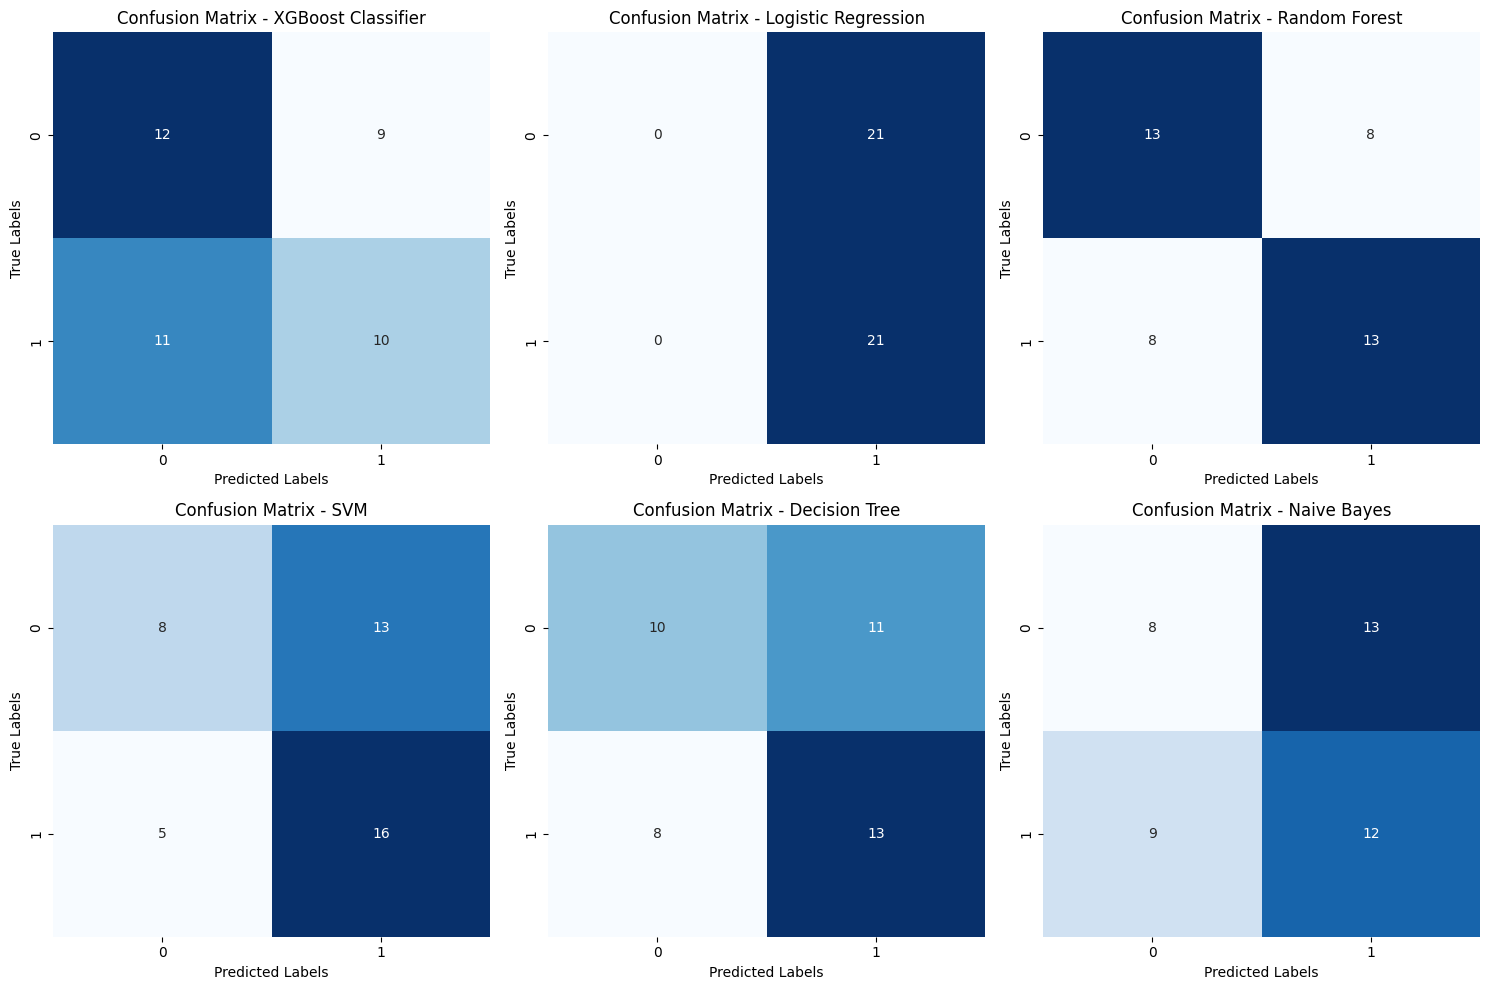

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# List of models, predictions, and confusion matrices
models = [xgb_classifier, logistic_reg, rf_classifier, svm_classifier, dt_classifier, nb_classifier]
y_preds = [y_pred_xgb, y_pred_lr, y_pred_rf, y_pred_svm, y_pred_dt, y_pred_nb]
model_names = ['XGBoost Classifier', 'Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes']

# Plot confusion matrices for each model
for i, (model, y_pred, name) in enumerate(zip(models, y_preds, model_names)):
    ax = axes[i // 3, i % 3]  # Select subplot
    conf_matrix = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Adjust layout
plt.tight_layout()
plt.show()


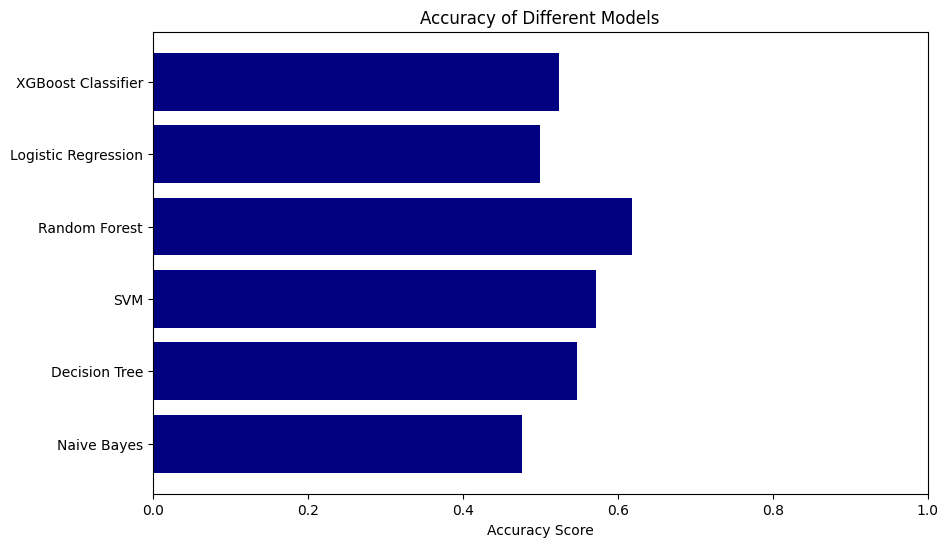

In [39]:
import matplotlib.pyplot as plt

# List of models and their accuracy scores
model_names = ['XGBoost Classifier', 'Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_lr),
                   accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm),
                   accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_nb)]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='navy')
plt.xlabel('Accuracy Score')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)  # Set the limit for x-axis from 0 to 1 (accuracy range)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()
